In [ ]:
#unzipping data of drive
#!7za -y x "/content/drive/MyDrive/Deep Learning/data/image/origin.7z.*"

In [ ]:
#copying unziped data to drive
# !cp -r ./origin "/content/drive/MyDrive/Deep Learning"

In [1]:
#Loading paths of mages and labels
label_file_path=r"/content/drive/MyDrive/Deep Learning/data/label/label.lst"
images_folder_path=r"/content/drive/MyDrive/Deep Learning/origin"

In [2]:
#Reading CSV label file into pandas with pre-defined column name
import pandas as pd
df_info= pd.read_csv(label_file_path, sep=" ", header=None)
col_name="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split(' ')
df_info.columns=col_name
#Displaying first five rows of labels
df_info.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [3]:
df_info[df_info.face_box_cofidence> 40]

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
5,angry_actor_137.jpg,0,93,468,842,467,88.9519,0
9,angry_actor_150.jpg,0,56,263,376,169,81.8792,0
...,...,...,...,...,...,...,...,...
91786,surprised_expression_409.jpg,0,80,46,184,218,63.8069,5
91787,expressionless_husband_673.jpg,0,48,194,388,242,82.2975,4
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5


In [4]:
#Checking the shape of label table in form of rows and columns
df_info.shape

(91793, 8)

In [5]:
#Selecting and displaying the data which has greater face_box_confidence
df_sel = df_info[df_info.face_box_cofidence> 40]
df_sel.shape

(57931, 8)

In [6]:
#Displaying the data which has greater face_box_confidence
df_sel.info

<bound method DataFrame.info of                            image_name  face_id_in_image  face_box_top  \
1                 angry_actor_109.jpg                 0            31   
3                  angry_actor_13.jpg                 0            77   
4                 angry_actor_132.jpg                 0            95   
5                 angry_actor_137.jpg                 0            93   
9                 angry_actor_150.jpg                 0            56   
...                               ...               ...           ...   
91786    surprised_expression_409.jpg                 0            80   
91787  expressionless_husband_673.jpg                 0            48   
91789    surprised_expression_381.jpg                 0            51   
91790    surprised_expression_395.jpg                 0            27   
91792    surprised_expression_394.jpg                 0            47   

       face_box_left  face_box_right  face_box_bottom  face_box_cofidence  \
1             

In [7]:
#Importing the libraries
import os
import cv2
from tqdm import tqdm
#Initialization of variables for Image and Labels
x=[]
y=[]
#Assigning image path to variable
images_folder_path=r"/content/drive/MyDrive/Deep Learning/origin"
#Performing iterations for 1000 samples
for i, row in df_sel.sample(1000).iterrows():
  image_name=row["image_name"]
  x1=row["face_box_left"]
  x2=row["face_box_right"]
  y1=row["face_box_top"]
  y2=row["face_box_bottom"]
  label=row["expression_label"]
  # Joining path of image and cropping of images
  images_folder = os.path.join(images_folder_path,image_name)
  image = cv2.imread (images_folder)

  #cropping of images if available
  if image is None:
    continue
  else:
    cropped = image[y1:y2, x1:x2]

  #Resizing of images to 64 by 64
  if cropped is not None:
    face_resized=cv2.resize(cropped, (64,64))
  else:
    continue

  #Storing labels and images to variables
  x.append(face_resized)
  y.append(label)
  #file_path="/content/drive/MyDrive/Deep Learning/pic/"+"raza" + str(image_name)+".jpg"
  #cv2.imwrite (file_path,face_resized)

In [8]:
#Checking the length of x and y
print(len(x))
print(len(y))

917
917


In [9]:
#Converting var 'x' and 'y' into Numpy Array
import numpy as np
x = np.array(x)
y = np.array(y)

In [10]:
#Converting var 'x' and 'y' in
import pandas as pd
pd.Series(y).value_counts()


3    357
6    285
4    124
5     55
1     45
0     35
2     16
dtype: int64

In [11]:
#Normalization of images
x = x/255.0

In [12]:
#Checking the length of array 'x'
len(x)

917

In [13]:
#Reshaping images from 3D to 1D
x_new = x.reshape((-1, 64*64*3))
len(x_new)

917

In [14]:
#Checking Images of each class
import pandas as pd
pd.Series(y).value_counts()

3    357
6    285
4    124
5     55
1     45
0     35
2     16
dtype: int64

In [15]:
#Overdsampling of images and labels to eliminate bias issue
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
x_smote,y_smote = sampler.fit_resample (x_new ,y)

pd.Series(y_smote).value_counts()

3    357
6    357
5    357
4    357
0    357
1    357
2    357
dtype: int64

In [16]:
#Reshaping images from 1D to 3D back
x = x_smote.reshape ((-1, 64, 64, 3))

In [17]:
#Displaying Images of each class
pd.Series(y_smote).value_counts()

3    357
6    357
5    357
4    357
0    357
1    357
2    357
dtype: int64

In [18]:
#Displaying tength of Images 'x'
len(x)

2499

In [19]:
#Displaying tength of length 'y'
len(y_smote)

2499

In [20]:
#Splitting the data into train, test and validation sets
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have loaded your dataset into 'x' and 'y_smote'
x_train, X_test, y_train, y_test = train_test_split(x, y_smote, test_size=0.3, random_state=42)
X_test, x_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.35, random_state=42)

***Building CNN Model***

In [23]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
# Define the model
model = Sequential([
    # First input layer
    Conv2D(32, (2, 2), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    # Second input layer
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    # Fully connected output layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # assuming 7 facial expression classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# show model
#model.summary()

# Train the model
model.fit(x_train,y_train,
    epochs=10,
    validation_data=(x_val, y_val))

Epoch 1/10
55/55 [==============================] - 8s 140ms/step - loss: 1.9521 - accuracy: 0.1441 - val_loss: 1.9356 - val_accuracy: 0.2129
Epoch 2/10
55/55 [==============================] - 7s 122ms/step - loss: 1.9111 - accuracy: 0.1938 - val_loss: 1.8619 - val_accuracy: 0.2776
Epoch 3/10
55/55 [==============================] - 7s 127ms/step - loss: 1.8339 - accuracy: 0.2556 - val_loss: 1.7485 - val_accuracy: 0.3194
Epoch 4/10
55/55 [==============================] - 7s 134ms/step - loss: 1.7180 - accuracy: 0.3185 - val_loss: 1.6228 - val_accuracy: 0.3878
Epoch 5/10
55/55 [==============================] - 7s 118ms/step - loss: 1.5795 - accuracy: 0.3671 - val_loss: 1.4720 - val_accuracy: 0.4297
Epoch 6/10
55/55 [==============================] - 8s 138ms/step - loss: 1.4841 - accuracy: 0.4111 - val_loss: 1.3533 - val_accuracy: 0.5095
Epoch 7/10
55/55 [==============================] - 6s 117ms/step - loss: 1.3123 - accuracy: 0.4911 - val_loss: 1.1828 - val_accuracy: 0.6654
Epoch 

***Evaluate Test Performance***

Without data Augumentation

In [24]:
__,train_accuracy = model.evaluate(x_train, y_train)

55/55 [==============================] - 2s 36ms/step - loss: 0.6322 - accuracy: 0.8319


In [25]:
__,test_accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 1s 31ms/step - loss: 0.8044 - accuracy: 0.7248


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)


es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

history = model.fit_generator(data_generator.flow(x_train, y_train, 16),
                                steps_per_epoch=len(x_train) / 16,
                                epochs=20,
                                verbose=2,
                                callbacks = [es],
                                validation_data=(x_val, y_val))

Epoch 1/20


<ipython-input-26-b07565a743e0>:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator.flow(x_train, y_train, 16),


109/109 - 8s - loss: 1.8461 - accuracy: 0.2659 - val_loss: 1.4761 - val_accuracy: 0.4867 - 8s/epoch - 73ms/step
Epoch 2/20
109/109 - 7s - loss: 1.7682 - accuracy: 0.2899 - val_loss: 1.3150 - val_accuracy: 0.5932 - 7s/epoch - 67ms/step
Epoch 3/20
109/109 - 7s - loss: 1.6655 - accuracy: 0.3322 - val_loss: 1.3209 - val_accuracy: 0.4829 - 7s/epoch - 68ms/step
Epoch 4/20
109/109 - 9s - loss: 1.6447 - accuracy: 0.3613 - val_loss: 1.2036 - val_accuracy: 0.6008 - 9s/epoch - 78ms/step
Epoch 5/20
109/109 - 9s - loss: 1.6001 - accuracy: 0.3865 - val_loss: 1.1402 - val_accuracy: 0.6426 - 9s/epoch - 78ms/step
Epoch 6/20
109/109 - 7s - loss: 1.5628 - accuracy: 0.4099 - val_loss: 1.2190 - val_accuracy: 0.5665 - 7s/epoch - 68ms/step
Epoch 7/20
109/109 - 7s - loss: 1.5229 - accuracy: 0.4048 - val_loss: 1.0927 - val_accuracy: 0.6388 - 7s/epoch - 67ms/step
Epoch 8/20
109/109 - 7s - loss: 1.4739 - accuracy: 0.4248 - val_loss: 1.0371 - val_accuracy: 0.6654 - 7s/epoch - 68ms/step
Epoch 9/20
109/109 - 9s - l

In [29]:
__,train_accuracy = model.evaluate(x_train, y_train)

55/55 [==============================] - 2s 32ms/step - loss: 0.6953 - accuracy: 0.7804


In [30]:
__,test_accuracy = model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 30ms/step - loss: 0.8533 - accuracy: 0.7043


***Visualize Training Performance***


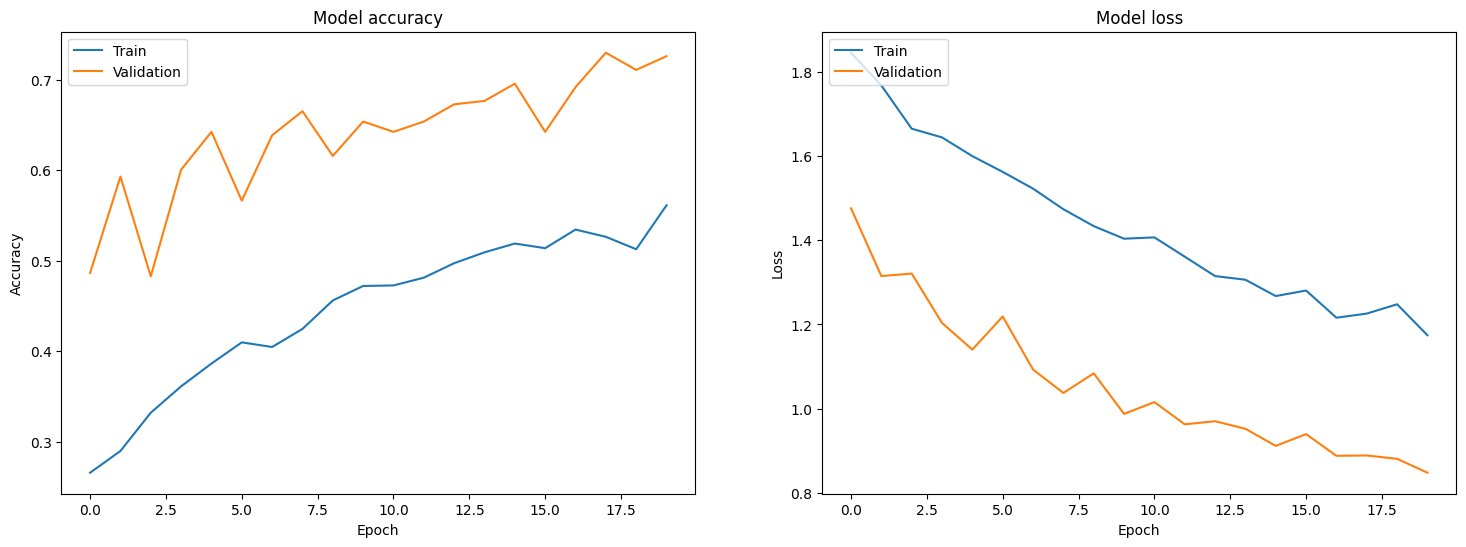

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')# the number of classifications a model correctly predicts divided by the total number of predictions made
axes[0].set_ylabel('Accuracy')#determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

***Evaluate the Model***

After training, we'll evaluate the model's performance on the testing data and calculate the accuracy.

In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.8532846570014954
Test Accuracy: 0.7043120861053467


In [35]:
# Make predictions
predictions = model.predict(X_test)
print(predictions)

16/16 [==============================] - 1s 29ms/step
[[1.68711282e-02 7.17959702e-01 3.43843916e-04 ... 1.05269067e-01
  6.86996896e-03 4.93610464e-02]
 [2.37557827e-03 4.99850694e-06 9.89757836e-01 ... 5.09562844e-04
  1.23701734e-03 1.04424113e-03]
 [9.86091971e-01 6.52964867e-04 3.70527909e-04 ... 3.03776498e-04
  4.10921784e-04 1.55529694e-03]
 ...
 [9.35638980e-08 1.87355137e-04 4.51699179e-06 ... 1.07102478e-02
  9.51408505e-01 3.10383346e-02]
 [4.87724226e-03 1.26950229e-02 1.33517012e-03 ... 1.02665275e-01
  4.73054320e-01 2.79377997e-01]
 [7.08917668e-03 2.08415791e-01 2.48088632e-02 ... 2.88616240e-01
  1.84813395e-01 1.46203756e-01]]


In [50]:
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

[1 2 0 3 5 2 0 1 0 3 1 2 5 1 0 5 4 2 3 4 5 0 5 3 5 5 3 6 6 1 5 5 6 0 2 1 0
 1 5 2 2 6 3 4 3 3 5 0 4 3 2 3 5 6 1 2 0 0 5 2 1 3 5 6 1 3 5 1 3 1 0 2 3 1
 1 3 1 1 6 5 3 6 0 0 2 2 4 3 1 4 2 2 5 6 0 2 3 3 0 3 1 2 4 1 6 6 0 5 5 1 0
 3 1 6 1 4 5 4 3 2 0 1 1 3 3 5 6 1 5 2 3 6 3 0 5 6 3 2 6 6 6 5 0 6 0 6 2 3
 4 2 3 0 5 5 0 3 1 2 5 1 0 1 5 1 4 3 3 5 2 0 6 3 1 6 0 3 6 3 6 0 3 0 1 3 3
 6 3 6 3 1 5 6 6 4 3 6 3 4 1 0 1 6 5 5 5 1 3 6 0 1 2 3 2 3 3 5 5 5 5 1 6 5
 0 2 2 6 1 5 2 5 4 5 1 0 3 3 3 2 1 2 3 2 0 0 2 0 5 3 5 3 1 5 1 3 1 2 0 6 3
 3 2 6 2 0 1 3 1 0 2 2 0 2 3 3 6 2 3 0 4 5 3 5 5 3 2 3 2 6 5 1 0 5 4 5 1 5
 1 5 2 1 5 6 4 5 1 6 2 5 0 2 3 6 5 6 3 2 4 0 2 5 1 5 1 2 3 0 1 3 1 3 4 0 3
 1 2 5 2 1 5 1 3 4 3 2 3 6 5 1 5 0 0 4 5 5 6 5 6 0 3 0 5 3 5 2 1 1 2 5 2 6
 2 1 6 2 3 1 5 0 3 0 3 0 3 2 2 4 0 5 5 5 3 0 1 0 2 4 3 5 0 6 2 4 5 6 3 6 4
 1 5 4 6 6 1 2 1 6 1 5 2 1 3 3 3 0 0 2 1 1 3 1 3 0 3 1 0 5 5 3 5 1 0 4 3 4
 1 5 0 1 0 3 6 6 1 0 2 2 2 4 3 5 2 3 0 3 5 0 3 6 1 5 3 6 1 4 2 1 0 4 2 6 3
 2 0 5 5 5 4]


***Confusion Matrix***

Confusion Matrix is applied and plotted to find out which emotion usually get confused with each other.

In [51]:
#check target labels
#classes and number

# Creating a barplot class distribution of train, val and test
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = df_sel['expression_label'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
print(emotion_counts)
print(emotion_map)

    emotion  number
0     Angry    2674
1     Happy   21005
2       Sad    6151
3   Neutral   19530
4    Digust    2745
5  Surprise    5070
6      Fear     756
{0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


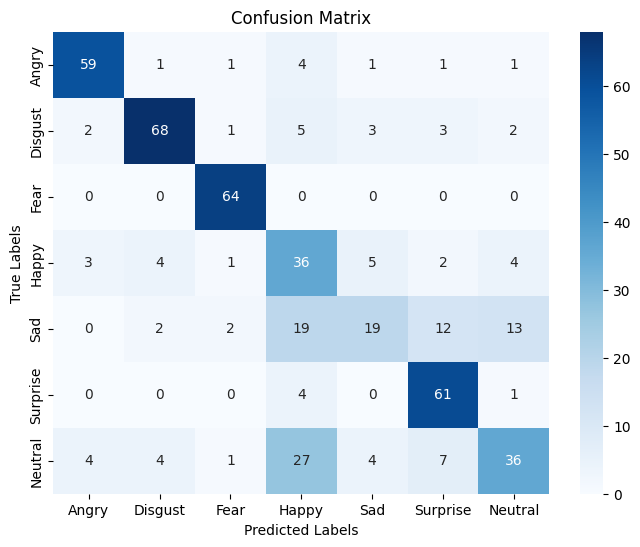

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)


# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

***Scratch Implementation of Single Neuron***

In [38]:
import numpy as np

def sigmoid(x):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-x))

# Define input matrix
X = np.array([[0.2], [0.4], [0.6]])

# Define weights and biases
W1 = np.array([[0.5, 0.3, 0.2]])  # Weights for hidden layer
B1 = np.array([[0.1]])  # Biases for hidden layer
W2 = np.array([[0.4]])  # Weights for output layer
B2 = np.array([[0.2]])  # Bias for output layer

# Forward propagation
Z1 = np.dot(W1, X) + B1  # Linear combination for hidden layer
A1 = sigmoid(Z1)  # Activation of hidden layer
Z2 = np.dot(W2, A1) + B2  # Linear combination for output layer
A2 = sigmoid(Z2)  # Activation of output layer

print("Output Prob:", A2)
print("Output Class:", 1 if A2[0,0] >= 0.5 else 0)

Output Prob: [[0.60904593]]
Output Class: 1


In [39]:
import numpy as np
from sklearn.metrics import accuracy_score

test_true = np.argmax(y_test)
test_pred = np.argmax(model.predict(X_test), axis=1)
#print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

16/16 [==============================] - 0s 29ms/step
